<a href="https://colab.research.google.com/github/PasinduWaidyarathna/Deep-Learning-Mini-Project-01/blob/main/test02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Mount Google Drive to access the images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set image dimensions

In [2]:
img_width, img_height = 125, 125

Load images and labels

In [7]:
data_path = '/content/drive/MyDrive/mltrain'
categories = ['test01', 'test02']

data = []
labels = []

for category in categories:
    path = os.path.join(data_path, category)
    label = categories.index(category)

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_arr = cv2.resize(img_arr, (img_width, img_height))
        data.append(img_arr)
        labels.append(label)

Convert data and labels to numpy arrays

In [8]:
data = np.array(data)
labels = np.array(labels)

Split the dataset into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Reshape the data for CNN input

In [10]:
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, 1)
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, 1)

Normalize pixel values to be between 0 and 1

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Create an ImageDataGenerator for data augmentation, resizing, and rescaling

In [12]:
target_size = (img_width, img_height)

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    validation_split=0.2
)

Create data generators for training and validation

In [13]:
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=target_size,
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=target_size,
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Build the CNN model

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compile the model

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train the model

In [16]:
#Calculate steps_per_epoch
steps_per_epoch = len(train_generator)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

<ipython-input-16-786050631c69>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
3/3 [==============================] - 6s 2s/step - loss: 2.0537 - accuracy: 0.4250 - val_loss: 1.0797 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 2s 615ms/step - loss: 0.9782 - accuracy: 0.5000 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 2s 544ms/step - loss: 0.6763 - accuracy: 0.5375 - val_loss: 0.6287 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 2s 751ms/step - loss: 0.5936 - accuracy: 0.8250 - val_loss: 0.5496 - val_accuracy: 0.8500
Epoch 5/10
3/3 [==============================] - 2s 522ms/step - loss: 0.4920 - accuracy: 0.9000 - val_loss: 0.3824 - val_accuracy: 0.9500
Epoch 6/10
3/3 [==============================] - 3s 880ms/step - loss: 0.3246 - accuracy: 0.9625 - val_loss: 0.2145 - val_accuracy: 0.9500
Epoch 7/10
3/3 [==============================] - 2s 601ms/step - loss: 0.1659 - accuracy: 0.9750 - val_loss: 0.1707 - val_accuracy: 0.9500
Epoch 8/10
3/3 [=======

Plotting validation accuracy and validation loss

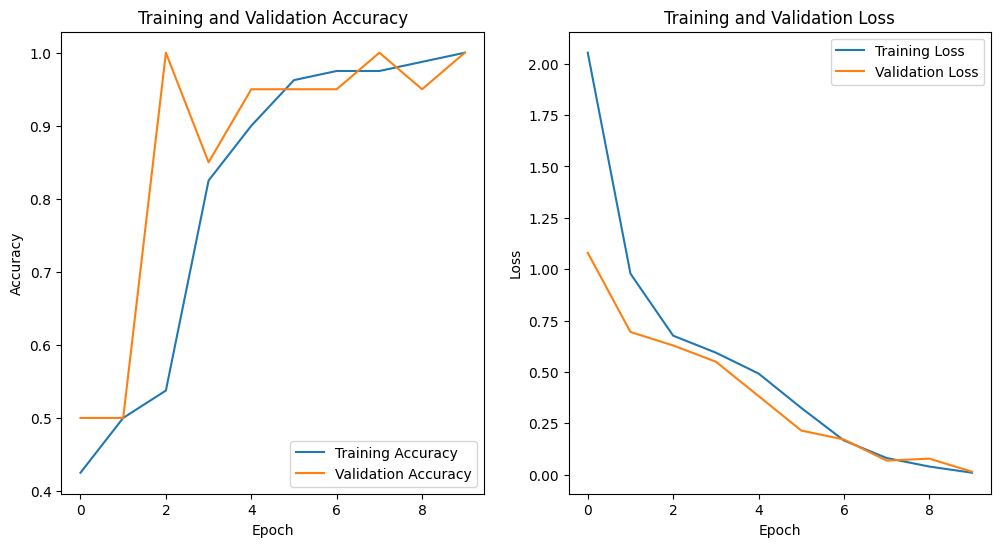

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Evaluate the model on the test set

In [19]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {accuracy}")

1/1 [==============================] - 0s 231ms/step - loss: 0.0085 - accuracy: 1.0000
Test Accuracy: 1.0


Random images and their predictions

1/1 [==============================] - 0s 32ms/step


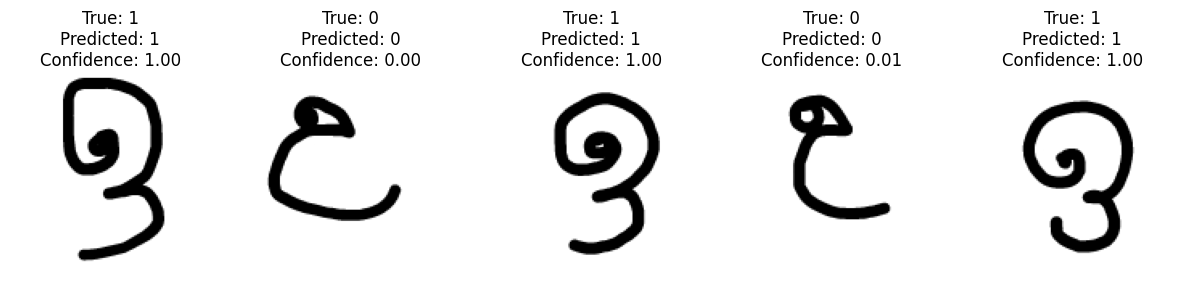

In [23]:
import random

# Function to plot
def plot_random_images(model, X_test, y_test, num_images=5):
    plt.figure(figsize=(15, 8))

    for i in range(num_images):
        index = random.randint(0, len(X_test) - 1)
        test_image = X_test[index].reshape(1, img_width, img_height, 1)
        true_label = y_test[index]

        # Predict the label for the test image
        prediction = model.predict(test_image)
        predicted_label = 1 if prediction > 0.5 else 0

        plt.subplot(1, num_images, i+1)
        plt.imshow(test_image.reshape(img_width, img_height), cmap='gray')
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}\nConfidence: {prediction[0][0]:.2f}')
        plt.axis('off')

# Plot random images and their predictions
plot_random_images(model, X_test, y_test)
plt.show()


Save the model

In [24]:
model.save("/content/drive/MyDrive/mltrain/saved_model_02.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
